In [2]:
#!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 

import pandas as pd
import numpy as np
from pandas.plotting import andrews_curves
from pandas.plotting import parallel_coordinates
from pandas.plotting import radviz
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(style="white", color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
car_evaluation = fetch_ucirepo(id=19) 

In [4]:
car_evaluation

{'data': {'ids': None,
  'features':      buying  maint  doors persons lug_boot safety
  0     vhigh  vhigh      2       2    small    low
  1     vhigh  vhigh      2       2    small    med
  2     vhigh  vhigh      2       2    small   high
  3     vhigh  vhigh      2       2      med    low
  4     vhigh  vhigh      2       2      med    med
  ...     ...    ...    ...     ...      ...    ...
  1723    low    low  5more    more      med    med
  1724    low    low  5more    more      med   high
  1725    low    low  5more    more      big    low
  1726    low    low  5more    more      big    med
  1727    low    low  5more    more      big   high
  
  [1728 rows x 6 columns],
  'targets':       class
  0     unacc
  1     unacc
  2     unacc
  3     unacc
  4     unacc
  ...     ...
  1723   good
  1724  vgood
  1725  unacc
  1726   good
  1727  vgood
  
  [1728 rows x 1 columns],
  'original':      buying  maint  doors persons lug_boot safety  class
  0     vhigh  vhigh      2    

In [5]:
X = car_evaluation.data.features#dataframe com os dados independentes - dados
y = car_evaluation.data.targets#dataframe com os dados dependentes - classificacao dos dados

In [6]:
X

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
dtypes: object(6)
memory usage: 81.1+ KB


In [8]:
for coluna in X.columns:
    print(X[coluna].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64


In [9]:
#transformando hierarquia em numero(0,1...)
#organizar colunas por colunas levando em consideracao a hierarquia
colunas = X.columns
for coluna in X.columns:
    target_name = dict()
    for i in range(len(X[coluna].value_counts().index)):
       target_name[X[coluna].value_counts().index[i]] = i
    X[coluna+str(1)] = X[coluna].map(target_name)
    X.drop(coluna, axis='columns', inplace=True)
X.columns = colunas
X

,buying,maint,doors,persons,lug_boot,safety
0,0,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,2
3,0,0,0,0,1,0
4,0,0,0,0,1,1
...,...,...,...,...,...,...
1723,3,3,3,2,1,1
1724,3,3,3,2,1,2
1725,3,3,3,2,2,0
1726,3,3,3,2,2,1


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1728 non-null   int64
 1   maint     1728 non-null   int64
 2   doors     1728 non-null   int64
 3   persons   1728 non-null   int64
 4   lug_boot  1728 non-null   int64
 5   safety    1728 non-null   int64
dtypes: int64(6)
memory usage: 81.1 KB


In [11]:
X.corr()#quanto mais proximo de zero as variaveis sao independentes

,buying,maint,doors,persons,lug_boot,safety
buying,1.000000e+00,-1.163678e-15,2.288293e-16,1.856658e-16,1.147215e-16,4.113082e-16
maint,-1.163678e-15,1.000000e+00,2.744718e-16,3.702055e-17,-9.445167e-17,7.812321e-17
doors,2.288293e-16,2.744718e-16,1.000000e+00,1.956599e-17,-2.674488e-18,3.406454e-17
persons,1.856658e-16,3.702055e-17,1.956599e-17,1.000000e+00,-9.251859e-18,1.137208e-17
lug_boot,1.147215e-16,-9.445167e-17,-2.674488e-18,-9.251859e-18,1.000000e+00,1.927471e-18
safety,4.113082e-16,7.812321e-17,3.406454e-17,1.137208e-17,1.927471e-18,1.000000e+00


In [12]:
y

,class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc
...,...
1723,good
1724,vgood
1725,unacc
1726,good


In [13]:
y['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [14]:
#modelos escolhidos
models = []
models.append(['LR', LogisticRegression(solver='newton-cg')])
models.append(['KNN', KNeighborsClassifier()])
models.append(['CART', DecisionTreeClassifier(max_depth=3,random_state=42)])
models.append(['NB', GaussianNB()])
models.append(['SVM', SVC()])

In [15]:
num_folds = 10
scoring = 'accuracy'

In [16]:
X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                   test_size= 0.2,
                                                   shuffle= True, 
                                                   random_state= 42)

In [22]:
#for para rodar os modelos
#os modelos foram rodados em defaut
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.819805 (0.022678)
KNN: 0.934861 (0.025923)
CART: 0.786550 (0.036699)
NB: 0.701152 (0.037413)
SVM: 0.960927 (0.018949)


In [18]:
k = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]#pesquisar o motivo de escolher impares
distancias = ['euclidean', 'manhattan', 'minkowski']
param_grid = dict(n_neighbors=k, metric=distancias)

model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, y_train)
print("Melhor: %f usando %s" %(grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f): %r' % (mean, stdev, param))

Melhor: 0.942092 usando {'metric': 'euclidean', 'n_neighbors': 7}
0.844443 (0.040458): {'metric': 'euclidean', 'n_neighbors': 1}
0.903727 (0.033254): {'metric': 'euclidean', 'n_neighbors': 3}
0.934861 (0.025923): {'metric': 'euclidean', 'n_neighbors': 5}
0.942092 (0.021279): {'metric': 'euclidean', 'n_neighbors': 7}
0.923272 (0.026402): {'metric': 'euclidean', 'n_neighbors': 9}
0.903013 (0.034787): {'metric': 'euclidean', 'n_neighbors': 11}
0.895783 (0.033166): {'metric': 'euclidean', 'n_neighbors': 13}
0.886367 (0.035774): {'metric': 'euclidean', 'n_neighbors': 15}
0.892879 (0.039394): {'metric': 'euclidean', 'n_neighbors': 17}
0.892879 (0.036317): {'metric': 'euclidean', 'n_neighbors': 19}
0.895042 (0.040772): {'metric': 'euclidean', 'n_neighbors': 21}
0.844443 (0.040458): {'metric': 'manhattan', 'n_neighbors': 1}
0.903727 (0.033254): {'metric': 'manhattan', 'n_neighbors': 3}
0.933417 (0.025684): {'metric': 'manhattan', 'n_neighbors': 5}
0.942081 (0.024723): {'metric': 'manhattan', '

In [19]:
k = ['linear', 'pol', 'rbf', 'sigmoid']
Cs = np.logspace(-2.3, -1.3, 10)
Cs = np.append(Cs, 1.0)

g = ['scale', 'auto']
param_grid = dict(C=Cs, kernel=k, gamma=g)

model = SVC()
kfold = KFold(n_splits=num_folds)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, y_train)
print("Melhor: %f usando %s" %(grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f): %r' % (mean, stdev, param))

Melhor: 0.961652 usando {'C': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}
0.705479 (0.038047): {'C': 0.005011872336272725, 'gamma': 'scale', 'kernel': 'linear'}
nan (nan): {'C': 0.005011872336272725, 'gamma': 'scale', 'kernel': 'pol'}
0.705479 (0.038047): {'C': 0.005011872336272725, 'gamma': 'scale', 'kernel': 'rbf'}
0.705479 (0.038047): {'C': 0.005011872336272725, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.705479 (0.038047): {'C': 0.005011872336272725, 'gamma': 'auto', 'kernel': 'linear'}
nan (nan): {'C': 0.005011872336272725, 'gamma': 'auto', 'kernel': 'pol'}
0.705479 (0.038047): {'C': 0.005011872336272725, 'gamma': 'auto', 'kernel': 'rbf'}
0.705479 (0.038047): {'C': 0.005011872336272725, 'gamma': 'auto', 'kernel': 'sigmoid'}
0.717052 (0.039460): {'C': 0.0064730820370104015, 'gamma': 'scale', 'kernel': 'linear'}
nan (nan): {'C': 0.0064730820370104015, 'gamma': 'scale', 'kernel': 'pol'}
0.705479 (0.038047): {'C': 0.0064730820370104015, 'gamma': 'scale', 'kernel': 'rbf'}
0.705479 (0.038047): 

Accuracy score =  0.953757225433526


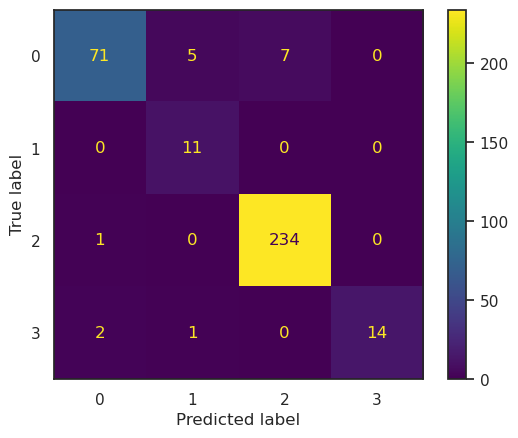

              precision    recall  f1-score   support

         acc       0.96      0.86      0.90        83
        good       0.65      1.00      0.79        11
       unacc       0.97      1.00      0.98       235
       vgood       1.00      0.82      0.90        17

    accuracy                           0.95       346
   macro avg       0.89      0.92      0.89       346
weighted avg       0.96      0.95      0.95       346



In [20]:
model = SVC(C= 1.0, gamma= 'auto', kernel= 'rbf')
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print("Accuracy score = ", accuracy_score(y_test, predictions))

# Matriz de confusão
cm = confusion_matrix(y_test, predictions)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot(values_format="d")
plt.show()
print(classification_report(y_test, predictions))

Acurácia
A acurácia é uma métrica fundamental na avaliação de desempenho em machine learning. Ela mede a proporção de previsões corretas em relação ao total de previsões feitas pelo modelo. Quanto maior a acurácia, maior a confiabilidade do modelo.

Precisão
A precisão é uma métrica que avalia a proporção de verdadeiros positivos em relação ao total de previsões positivas. Ela fornece uma medida de quão precisas são as previsões positivas em relação às previsões totais feitas pelo modelo.

Recall
O recall, também conhecido como taxa de sensibilidade, é uma métrica que avalia a proporção de verdadeiros positivos em relação ao total de casos positivos reais. Ela mede a capacidade do modelo de identificar corretamente os casos positivos.

F1-Score
O F1-Score é uma métrica que combina a precisão e o recall em um único valor. Ele fornece uma medida balanceada entre a precisão e o recall, levando em consideração tanto os falsos positivos quanto os falsos negativos.

Suport
Esses valores simplesmente nos dizem quantos itens pertenciam a cada classe no conjunto de dados de teste.